In [1]:
import numpy as np
import matplotlib.pyplot as plt

# find .py modules in subfolders
import my_paths
%load_ext autoreload
%autoreload 2

import axes

### Data
These data were obtained by running the `accuracy chart` code in the validation.ipynb notebook multiple times, with different parameters. For comparison, the data also includes the error rates of the CW Skimmer decoder measured on the same data.

In [2]:
Skim_HandKey = {
    'Skim_HandKey_wpm_12_doppl_0.1': [0.9170138310281619, 0.8180636993603412, 0.4341943009498417, 0.2836716328367163, 0.18564669820750315, 0.11144809198466922, 0.09541259952693473, 0.08184756890058986, 0.08056508846166661, 0.08194208404145423],
    'Skim_HandKey_wpm_12_doppl_0.3': [0.9097057941558658, 0.8328778992268728, 0.4889866373421307, 0.33548795521940494, 0.24116784428742835, 0.14179527349088364, 0.11416286123795874, 0.09335110814864189, 0.09274193548387097, 0.09658182302771855],
    'Skim_HandKey_wpm_12_doppl_1': [0.9132535741660279, 0.9219822702126241, 0.6458083433293349, 0.48582281011561657, 0.3955208958208358, 0.27032161306448926, 0.241, 0.2392723880597015, 0.24950838249508384, 0.26549173773987206],
    'Skim_HandKey_wpm_12_doppl_3': [0.9529, 1.053364887837072, 0.933188937020993, 0.8378108126124925, 0.7749200426439232, 0.7636963476406292, 0.7806430118274196, 0.8679597413850563, 0.9039909387700713, 0.9523127166089043],
    'Skim_HandKey_wpm_18_doppl_0.1': [0.8931201066133599, 0.7619809371459042, 0.3993333333333333, 0.25494835054981674, 0.1733582114417086, 0.10190891827964153, 0.0913118795389433, 0.07676410786307124, 0.07672821811879207, 0.08073437291749967],
    'Skim_HandKey_wpm_18_doppl_0.3': [0.8866522246292284, 0.7806137749491853, 0.42445755424457554, 0.29379434395922854, 0.20594409089394597, 0.13079128058129458, 0.10522634156090736, 0.09040940737532896, 0.08574569439355074, 0.09256358121395954],
    'Skim_HandKey_wpm_18_doppl_1': [0.8878853524412598, 0.8263606688428485, 0.5573065902578797, 0.4200333333333333, 0.3314011593044173, 0.23765874470850973, 0.2018865408972735, 0.19692123150739704, 0.20291110148885855, 0.20315312312512498],
    'Skim_HandKey_wpm_18_doppl_3': [0.8883077948034643, 0.9102179564087183, 0.7922315866617808, 0.7018397546993734, 0.6294272481924499, 0.5713428857047651, 0.5588627424838344, 0.5836776859504132, 0.5950809838032394, 0.6035447761194029],
    'Skim_HandKey_wpm_24_doppl_0.1': [0.8948595795715761, 0.7709061844340094, 0.4294615487138478, 0.2781313518376595, 0.18753748750416527, 0.1056680431597176, 0.09069093090690931, 0.07586206896551724, 0.07917790879717532, 0.08325559701492537],
    'Skim_HandKey_wpm_24_doppl_0.3': [0.8920836942760045, 0.7843320121240382, 0.44249733475479747, 0.29289023699210026, 0.21048596760215985, 0.1299467021985343, 0.10686310456318122, 0.09181736437206514, 0.08607771968965403, 0.09351367558383583],
    'Skim_HandKey_wpm_24_doppl_1': [0.8903096903096903, 0.812335564658474, 0.552412368385979, 0.4111729238149172, 0.32902581182348045, 0.23671932280210625, 0.21255909968702139, 0.19712676244125196, 0.19322914931191895, 0.20289082794911076],
    'Skim_HandKey_wpm_24_doppl_3': [0.8825097464263103, 0.8602458606789486, 0.790241951609678, 0.7052123230641132, 0.6333488868150913, 0.5659824046920822, 0.5495702578452928, 0.532967032967033, 0.5385537355173792, 0.548],
    'Skim_HandKey_wpm_32_doppl_0.1': [0.9047952280982372, 0.8234080090542925, 0.5488434015643202, 0.41315868413158685, 0.310504565753516, 0.20605858854860187, 0.1972891064708429, 0.18051299133910725, 0.17964849211104453, 0.19769028521982226],
    'Skim_HandKey_wpm_32_doppl_0.3': [0.9018627745009831, 0.8202745019654873, 0.5570948083519265, 0.4152959978690817, 0.3185887834914295, 0.2323528431993071, 0.20575007495752407, 0.18361770194614768, 0.1827684932418936, 0.1951698867421719],
    'Skim_HandKey_wpm_32_doppl_1': [0.9041063929071396, 0.8319126265316995, 0.627571057711509, 0.49746835443037973, 0.40745180301668166, 0.30915331045283395, 0.27968812475009996, 0.2525380288253503, 0.24553571428571427, 0.260504481690047],
    'Skim_HandKey_wpm_32_doppl_3': [0.891677498916775, 0.8462896349586997, 0.7846752987384749, 0.7084804476717074, 0.6470744946551666, 0.5640393267788701, 0.5418221807517996, 0.5104829839005367, 0.5122292569143618, 0.5282748508780699],
    'Skim_HandKey_wpm_40_doppl_0.1': [0.9190818842028117, 0.8566532459321865, 0.6789802981895634, 0.526571818878486, 0.4353007756583109, 0.33504262120404904, 0.3182620276344265, 0.29662344588513717, 0.2874746061877643, 0.2945251098974291],
    'Skim_HandKey_wpm_40_doppl_0.3': [0.915984015984016, 0.8551935301361201, 0.6847800752505577, 0.539470617612785, 0.4331812581171534, 0.34604115335952584, 0.3315573906962805, 0.3121668443496802, 0.2826173826173826, 0.2979878739423013],
    'Skim_HandKey_wpm_40_doppl_1': [0.9070588627202771, 0.8484555662923595, 0.7189435822287351, 0.5930492152877278, 0.49469235632757647, 0.4014574252154527, 0.3794619072988812, 0.33516575045810426, 0.3169114952866327, 0.3375549926676443],
    'Skim_HandKey_wpm_40_doppl_3': [0.8990309367611309, 0.8394629888733427, 0.7987475851042569, 0.7417851316709392, 0.6732838157412651, 0.5903193612774451, 0.5621733195725273, 0.5312624983335555, 0.5228264127068696, 0.5566423794789899],
}
Skim_Paddle = {
    'Skim_Paddle_wpm_12_doppl_0.1': [0.8891812670708147, 0.7445284653053066, 0.35222159261357955, 0.21035965467817738, 0.1294870512948705, 0.04992334866360061, 0.031924820047987204, 0.01569895340310646, 0.014062916555585177, 0.0172959642750025],
    'Skim_Paddle_wpm_12_doppl_0.3': [0.8864855857357107, 0.7614700296538167, 0.3884093711467324, 0.2526747325267473, 0.17089746152308616, 0.07451698867421719, 0.04943700446398827, 0.025911740216486262, 0.02566324490067991, 0.028862818290894546],
    'Skim_Paddle_wpm_12_doppl_1': [0.8881263326226013, 0.8264333333333334, 0.5145589019189766, 0.37655802172898756, 0.27523149690227167, 0.1530513615305136, 0.12863568215892054, 0.12073333333333333, 0.12023333333333333, 0.13701506465804558],
    'Skim_Paddle_wpm_12_doppl_3': [0.8953348883705432, 0.9085333333333333, 0.6543304463690873, 0.5461722966220268, 0.4649032215078122, 0.427890703098967, 0.43688543715209494, 0.48563812062645784, 0.5253164556962026, 0.5313781036493918],
    'Skim_Paddle_wpm_18_doppl_0.1': [0.8841197429323033, 0.7197760074664178, 0.33782162378349556, 0.18326666666666666, 0.09982679368463127, 0.0325311645890274, 0.01839141733857533, 0.009497150854743577, 0.008892589508742714, 0.011758044100992605],
    'Skim_Paddle_wpm_18_doppl_0.3': [0.8851994937720642, 0.7325802259322204, 0.34703394064550513, 0.1887037654115295, 0.12272575808063979, 0.05478037896699857, 0.03284914712153518, 0.017693512378794442, 0.017252864375166533, 0.020224569353280247],
    'Skim_Paddle_wpm_18_doppl_1': [0.8869226154769047, 0.7921177999133824, 0.4398454929905764, 0.29684533129018287, 0.21324141605888033, 0.12322653700126557, 0.10109626470294225, 0.09676989676989677, 0.10424646128226478, 0.10862683682649694],
    'Skim_Paddle_wpm_18_doppl_3': [0.8823333333333333, 0.834770736905198, 0.6050246568039451, 0.4825265682779758, 0.42485751424857515, 0.3571476174608464, 0.34262191260291325, 0.3599466844385205, 0.36548781707276423, 0.36141929035482256],
    'Skim_Paddle_wpm_24_doppl_0.1': [0.8960095929651589, 0.7442201345859151, 0.36388463331779125, 0.19190170157503914, 0.10137497086926124, 0.0385755688064226, 0.021658003465280556, 0.011062241769958684, 0.006960170507526309, 0.010859427048634244],
    'Skim_Paddle_wpm_24_doppl_0.3': [0.8890850936229759, 0.7546843278863115, 0.3653097227307526, 0.21710438608185575, 0.12322511832544497, 0.050777996201645956, 0.03411741187445859, 0.017839313053318245, 0.01741939781508127, 0.024016521768095666],
    'Skim_Paddle_wpm_24_doppl_1': [0.8970642140691126, 0.7964938008265564, 0.45674613745338305, 0.29880690528560955, 0.2208748375920312, 0.13504598160735706, 0.11117772448707701, 0.10107498252737378, 0.09808102345415778, 0.10883538148999233],
    'Skim_Paddle_wpm_24_doppl_3': [0.8932853717026379, 0.8268230902546327, 0.6535346465353464, 0.5423254884990513, 0.45923876816424475, 0.41877208186120923, 0.39626473134030227, 0.3903682719546742, 0.38674879307474613, 0.4053117398113899],
    'Skim_Paddle_wpm_32_doppl_0.1': [0.9246130803794309, 0.8171641791044776, 0.4771100382886632, 0.2916042727363482, 0.1434420772303595, 0.04816628360147897, 0.033995937801751405, 0.021532215122470715, 0.023060517195414555, 0.043015048608336666],
    'Skim_Paddle_wpm_32_doppl_0.3': [0.9161167766446711, 0.8285095753538718, 0.4636203046362031, 0.26151950992142764, 0.15460208534594758, 0.06268507735817667, 0.04098878796952457, 0.03076308429884139, 0.03412003595086715, 0.050234851260868116],
    'Skim_Paddle_wpm_32_doppl_1': [0.9112376765254463, 0.8459900166389351, 0.5408509788254096, 0.34200619648865643, 0.24411862712429191, 0.1556836353944563, 0.1262747450509898, 0.10958949753431961, 0.1041222695791156, 0.12328539086429617],
    'Skim_Paddle_wpm_32_doppl_3': [0.8987455495291652, 0.8362298575043281, 0.724274494142705, 0.6039317433389881, 0.5273436198220415, 0.4517580403266122, 0.42625737426257376, 0.39743760399334443, 0.38932135728542916, 0.4245964386753204],
    'Skim_Paddle_wpm_40_doppl_0.1': [0.9323088181485547, 0.8842887119874763, 0.704409218063141, 0.4891851358106982, 0.30861116656684634, 0.14145075996940168, 0.1043234961028579, 0.08539834798827604, 0.10767849423032157, 0.2021085539443927],
    'Skim_Paddle_wpm_40_doppl_0.3': [0.9313228923692103, 0.8729498652649789, 0.7224070254806733, 0.4835380671793335, 0.3063045070235004, 0.14494105108905614, 0.10754478257974295, 0.09341317365269461, 0.10324513230154768, 0.21175140491470754],
    'Skim_Paddle_wpm_40_doppl_1': [0.9231102519664045, 0.8698965161547932, 0.7563965884861408, 0.5484419263456091, 0.38165729682977945, 0.22645150557311594, 0.19222188925515266, 0.1761081693142838, 0.18388085560071965, 0.2595501131372288],
    'Skim_Paddle_wpm_40_doppl_3': [0.9077117572692794, 0.8469319845600959, 0.8033266799733866, 0.731575793888556, 0.6334188689305829, 0.511890903043406, 0.48457211330426386, 0.4434794183221856, 0.4503333333333333, 0.5052596537949401],
}
Deep_HandKey = {
    'Deep_HandKey_wpm_12_doppl_0.1': [0.9259162645102387, 0.8314899154196487, 0.5231367465975373, 0.3956272774596564, 0.2828151424482893, 0.1790398740818468, 0.1523797172869926, 0.12675324675324676, 0.11958495460440986, 0.11259220913679306],
    'Deep_HandKey_wpm_12_doppl_0.3': [0.923036580569031, 0.852128356254093, 0.5672393747577832, 0.40448569218870845, 0.311388131411505, 0.20119729307652265, 0.15445467513941122, 0.12007746933505488, 0.11082138200782268, 0.10555699818229032],
    'Deep_HandKey_wpm_12_doppl_1': [0.9369322605761744, 0.873427571002464, 0.6314632885211996, 0.47384174908901616, 0.352872519776942, 0.19950385167776472, 0.14871728089595, 0.12257896789288963, 0.11874348279457768, 0.1117485982527057],
    'Deep_HandKey_wpm_12_doppl_3': [0.9159268929503916, 0.8742023701002735, 0.6949612403100776, 0.5452758485126458, 0.38645833333333335, 0.2078226857887875, 0.16899022801302932, 0.12802275960170698, 0.12147223306021589, 0.1253910323253389],
    'Deep_HandKey_wpm_18_doppl_0.1': [0.9179153094462541, 0.7781127129750983, 0.42081627261920485, 0.3042109405745769, 0.20553308103875767, 0.12069857697283312, 0.10893303512695698, 0.09930106817882105, 0.08240680183126227, 0.08371305819554746],
    'Deep_HandKey_wpm_18_doppl_0.3': [0.9213720316622691, 0.8033172260676505, 0.46348131753677907, 0.32020480504135485, 0.22846638655462184, 0.14244641923680085, 0.115625, 0.09546351084812624, 0.08907254361799816, 0.08906514107398257],
    'Deep_HandKey_wpm_18_doppl_1': [0.9201952249043662, 0.8299960738123282, 0.5345911949685535, 0.38608173390782086, 0.2684809629726547, 0.15213406650955746, 0.11247550620509471, 0.08937007874015748, 0.09417335262396423, 0.09590826166275736],
    'Deep_HandKey_wpm_18_doppl_3': [0.921983039791259, 0.8341145833333333, 0.6035649232370544, 0.4495737704918033, 0.30641175705553386, 0.15722120658135283, 0.11585127201565558, 0.09576573011476058, 0.09267719618848715, 0.08446298227320125],
    'Deep_HandKey_wpm_24_doppl_0.1': [0.913828689370485, 0.762628230099987, 0.4121172638436482, 0.27253558249868215, 0.1864964464332719, 0.11044620788343958, 0.08183581124757595, 0.06896103896103896, 0.05955497382198953, 0.06342163643481666],
    'Deep_HandKey_wpm_24_doppl_0.3': [0.9100233705531031, 0.7833289508282935, 0.4463276836158192, 0.29246637942290116, 0.2098635886673662, 0.11279175902986048, 0.08713365751084243, 0.06714754098360656, 0.05924170616113744, 0.0674350821409645],
    'Deep_HandKey_wpm_24_doppl_1': [0.9188512712422606, 0.8109732201175702, 0.509165238032441, 0.3643308746048472, 0.26141508213685166, 0.13701701173677963, 0.09277676001046846, 0.06006514657980456, 0.06311064166886718, 0.059551733124837115],
    'Deep_HandKey_wpm_24_doppl_3': [0.9118457300275482, 0.8293037389351301, 0.5864157752287666, 0.4442977824709609, 0.3036135113904163, 0.14691758598312785, 0.0982900404646913, 0.06555454190016942, 0.06683298319327731, 0.06502566802685271],
    'Deep_HandKey_wpm_32_doppl_0.1': [0.9095627351758142, 0.7478588113158577, 0.42206424433912587, 0.2801324503311258, 0.1894941634241245, 0.10088706474248643, 0.07401188323430638, 0.05852647934740386, 0.057334914986160536, 0.051345059493016036],
    'Deep_HandKey_wpm_32_doppl_0.3': [0.9150463265039802, 0.7803708025411643, 0.4518866692779736, 0.31140583554376655, 0.20664109009128193, 0.11071663379355687, 0.08196504237288135, 0.06396255850234009, 0.055386649041639126, 0.06033123028391167],
    'Deep_HandKey_wpm_32_doppl_1': [0.9188937641271108, 0.8057506293891613, 0.5056559615134573, 0.3584954270256344, 0.25388127853881276, 0.12808988764044943, 0.09641980095644306, 0.0557468220338983, 0.06133438402941949, 0.05782941642461051],
    'Deep_HandKey_wpm_32_doppl_3': [0.9184294024325753, 0.8221354166666667, 0.5893694632621157, 0.43481078278900986, 0.31108761728558215, 0.15765884524123386, 0.108011634056055, 0.07015239096163951, 0.06115014311735623, 0.0661437908496732],
    'Deep_HandKey_wpm_40_doppl_0.1': [0.9088082901554404, 0.7943335479716678, 0.4287985163597828, 0.2886775003302946, 0.19592808038075094, 0.10300712213136376, 0.08443408443408443, 0.06183396921457703, 0.058095112633381636, 0.05554817275747508],
    'Deep_HandKey_wpm_40_doppl_0.3': [0.9081754339472639, 0.775055972606348, 0.44972771948465934, 0.2958627111879739, 0.21439915299100054, 0.11711595511414936, 0.08162183649132106, 0.05778130371545683, 0.05818709592294498, 0.05504950495049505],
    'Deep_HandKey_wpm_40_doppl_1': [0.9097589274203944, 0.7984414212125215, 0.4958842272968667, 0.3555870601881686, 0.2427016985138004, 0.12708600770218229, 0.09161290322580645, 0.06617940199335548, 0.05547425834774511, 0.05792118487172706],
    'Deep_HandKey_wpm_40_doppl_3': [0.9147523569247112, 0.8092919189260331, 0.5753910871565663, 0.43530499075785584, 0.3295514511873351, 0.16776358239772873, 0.11646998460749101, 0.07732887287699435, 0.06743204011612562, 0.06771176393097089],
}                                    
Deep_Paddle = {                                    
    'Deep_Paddle_wpm_12_doppl_0.1': [0.9145652173913044, 0.7976139016166681, 0.4450701784785999, 0.2928928493805694, 0.18358662613981763, 0.08105761299005775, 0.052105948762483714, 0.027360491796181653, 0.025461655442102975, 0.02748946888435315],
    'Deep_Paddle_wpm_12_doppl_0.3': [0.9250335832213893, 0.8203872980115237, 0.4724822326226382, 0.30994837086207644, 0.19825376829851005, 0.09758529501018771, 0.057384148982243394, 0.026528407863469432, 0.027605094987610313, 0.025772301284276294],
    'Deep_Paddle_wpm_12_doppl_1': [0.9330822836861014, 0.8526558489581068, 0.5472148656275778, 0.3785993910395824, 0.23959914971150925, 0.08990706721417766, 0.05211133269747681, 0.03113330438558402, 0.026089598888695956, 0.028519259194852622],
    'Deep_Paddle_wpm_12_doppl_3': [0.922342676974906, 0.8580793609446905, 0.6034228129615151, 0.4133020751931927, 0.25508037609948436, 0.09551073519843852, 0.05651627443332033, 0.030201779127793447, 0.029593255692682077, 0.031901947148817805],
    'Deep_Paddle_wpm_18_doppl_0.1': [0.9079671529658426, 0.7465834170196044, 0.3688877298213587, 0.24017180172678265, 0.13548134960267488, 0.05251002265992679, 0.027757200749487995, 0.011426577696367046, 0.00991994430908458, 0.009511400651465798],
    'Deep_Paddle_wpm_18_doppl_0.3': [0.9144895190582469, 0.7619358488923706, 0.39403193438617923, 0.2533554122363605, 0.15689098367810073, 0.06459351011863224, 0.03495771946648069, 0.013583158630328442, 0.011219277949971624, 0.008700191404210893],
    'Deep_Paddle_wpm_18_doppl_1': [0.9190839694656489, 0.7971908637437648, 0.4567502726281352, 0.3150130548302872, 0.2013855605420243, 0.07842794759825328, 0.03415716647811331, 0.01196663318338647, 0.010724094337155064, 0.010130434782608696],
    'Deep_Paddle_wpm_18_doppl_3': [0.9160729800173762, 0.8125435236768802, 0.5356987185075408, 0.36122448979591837, 0.21778751369112814, 0.06929223245862988, 0.03060825771718838, 0.01303059356750632, 0.010999563509384549, 0.011857880458563052],
    'Deep_Paddle_wpm_24_doppl_0.1': [0.9012984734163888, 0.7394917552377204, 0.37280510177339043, 0.22884380985547623, 0.1369653545371139, 0.048132780082987554, 0.024579109931700528, 0.008574303337853799, 0.00496105139475173, 0.005134676471868065],
    'Deep_Paddle_wpm_24_doppl_0.3': [0.9092665788317962, 0.7514888772114205, 0.38854139518721226, 0.25217202432667246, 0.15877681744395208, 0.06167094333057887, 0.029876208389834215, 0.009196409021239325, 0.0063052806725632715, 0.006884153292993072],
    'Deep_Paddle_wpm_24_doppl_1': [0.9123349745109146, 0.7793705067508329, 0.45177863891670655, 0.3081346854559024, 0.1953526898596216, 0.07406597252603027, 0.03462161334092003, 0.008643762888859638, 0.006164742917103882, 0.00533146877594721],
    'Deep_Paddle_wpm_24_doppl_3': [0.91383959638135, 0.7997804610318332, 0.532516781448871, 0.3793133458074061, 0.24066154651771687, 0.08450581900295293, 0.038898105299921416, 0.010363604426488671, 0.009073855952536753, 0.008618438234525986],
    'Deep_Paddle_wpm_32_doppl_0.1': [0.895545180854313, 0.7353480653332168, 0.3832405635762741, 0.23046380732143637, 0.13505496422962834, 0.04744734180554945, 0.02389257063132194, 0.00640885904869861, 0.004934713306257915, 0.003157479279042231],
    'Deep_Paddle_wpm_32_doppl_0.3': [0.89515140906704, 0.743650067529299, 0.38878389662901597, 0.2465205288796103, 0.1492758680858489, 0.05496938908427771, 0.029504189944134077, 0.007830026833238024, 0.004076265614727153, 0.0050268828954845475],
    'Deep_Paddle_wpm_32_doppl_1': [0.9037655076009086, 0.7591645912526762, 0.4279051521227443, 0.2928029972989457, 0.182359848649589, 0.07040785301654867, 0.03545696694467491, 0.008123334934707604, 0.004911849837733532, 0.0042343286188231185],
    'Deep_Paddle_wpm_32_doppl_3': [0.9095466434176112, 0.7868152921710354, 0.5239817033326073, 0.3686219453340938, 0.23996517196343056, 0.09553501351704892, 0.04415561682202092, 0.011467689892735677, 0.007498147260124679, 0.006329113924050633],
    'Deep_Paddle_wpm_40_doppl_0.1': [0.9044124110046585, 0.7525665108557948, 0.3798335356337784, 0.244219209337019, 0.14862312793710747, 0.05273771426066372, 0.02591304347826087, 0.006380485264117366, 0.0038191129242253277, 0.003693768963546018],
    'Deep_Paddle_wpm_40_doppl_0.3': [0.9091857130442339, 0.7533655731276957, 0.4039408866995074, 0.2563562113028586, 0.152319318971508, 0.06020198487299436, 0.028552803129074315, 0.009535527529990772, 0.004435466163102191, 0.004872695346795434],
    'Deep_Paddle_wpm_40_doppl_1': [0.9101133391455972, 0.7703201702941048, 0.43764042468831227, 0.2954239861201475, 0.19457367711639637, 0.07852696643886302, 0.038267875125881166, 0.00899452507169549, 0.006004176818656457, 0.004990806409246125],
    'Deep_Paddle_wpm_40_doppl_3': [0.9136383442265795, 0.7878614749055112, 0.5231863692253644, 0.3793418647166362, 0.26211864774551924, 0.10845939836550166, 0.05568122498694971, 0.01794949802251293, 0.011642210702047271, 0.011475122634898388],
}

wpms = [12,18,24,32,40]
dopplers = [0.1, 0.3, 1, 3]
snrs = [-16, -12, -6, -3, 0, 6, 10, 20, 30, 50]

#[wpm,doppl,snr]
Skim_Paddle_matrix = np.array(list(Skim_Paddle.values())).reshape(5,4,10)
Skim_HandKey_matrix = np.array(list(Skim_HandKey.values())).reshape(5,4,10)
Deep_Paddle_matrix = np.array(list(Deep_Paddle.values())).reshape(5,4,10)
Deep_HandKey_matrix = np.array(list(Deep_HandKey.values())).reshape(5,4,10)

### Plot Error Rates
Plot the data above.

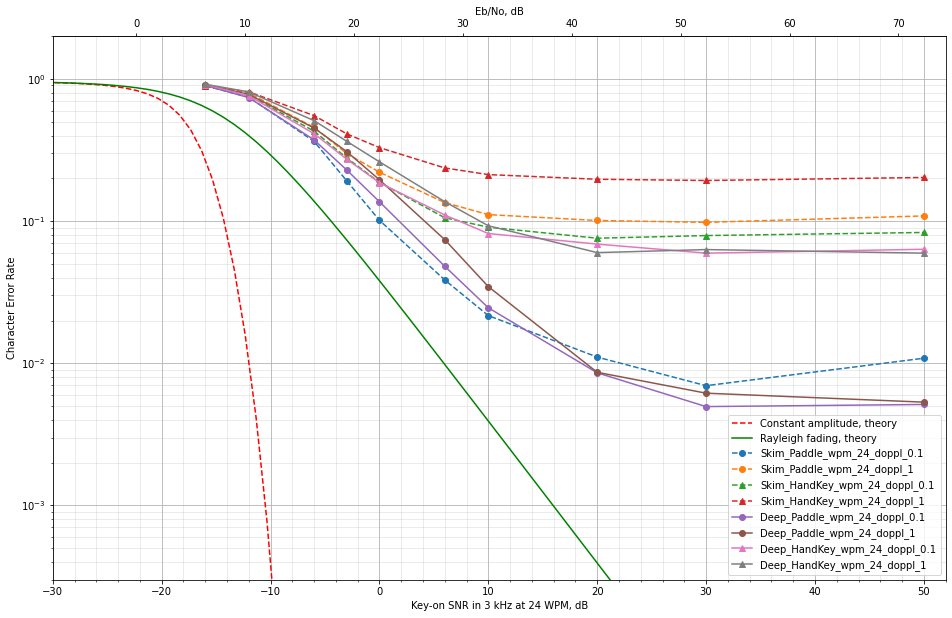

In [3]:
snrs = [-16, -12, -6, -3, 0, 6, 10, 20, 30, 50]
ax = axes.plot_axes()

skims_p = ['Skim_Paddle_wpm_24_doppl_0.1',  'Skim_Paddle_wpm_24_doppl_1']
skims_h = ['Skim_HandKey_wpm_24_doppl_0.1', 'Skim_HandKey_wpm_24_doppl_1']
deeps_p = ['Deep_Paddle_wpm_24_doppl_0.1',  'Deep_Paddle_wpm_24_doppl_1']
deeps_h = ['Deep_HandKey_wpm_24_doppl_0.1', 'Deep_HandKey_wpm_24_doppl_1']

for k in skims_p: ax.plot(snrs, Skim_Paddle[k], 'o--', label=k) 
for k in skims_h: ax.plot(snrs, Skim_HandKey[k], '^--', label=k) 
for k in deeps_p: ax.plot(snrs, Deep_Paddle[k], 'o-', label=k) 
for k in deeps_h: ax.plot(snrs, Deep_HandKey[k], '^-', label=k) 
ax.legend()    
plt.show() 

### Slice Error Data
Plot error rate as a function of Doppler spread and keying speed, for CW Skimmer and DeepCW decoder

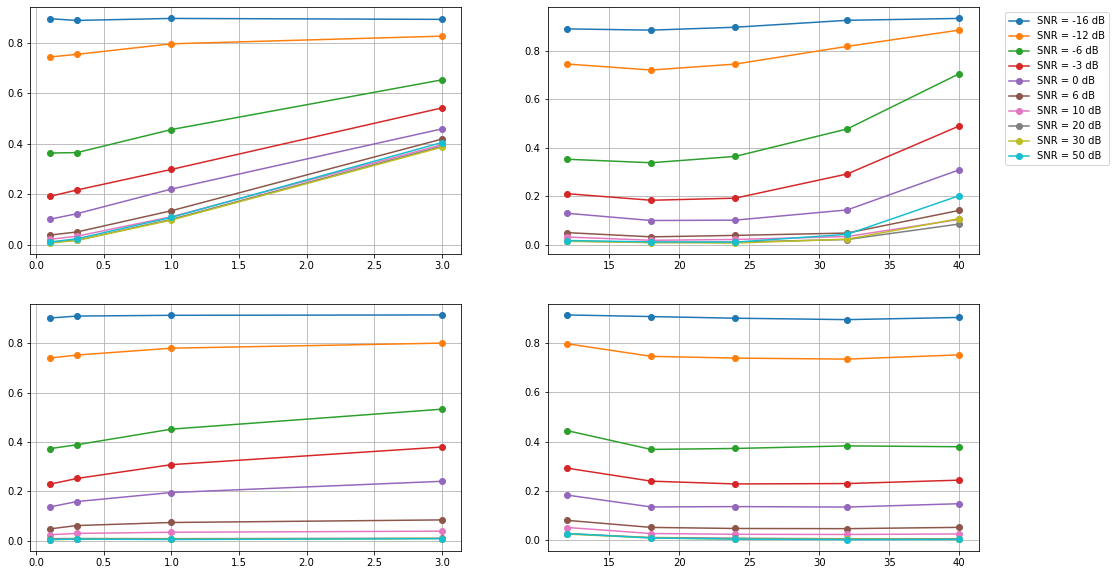

In [4]:
# all data: [wpm,doppl,snr]

#[snr, doppl], wpm=24
data00 = Skim_Paddle_matrix[2,:,:].T
data10 = Deep_Paddle_matrix[2,:,:].T

#[snr, wpm], doppl=0.1
data01 = Skim_Paddle_matrix[:,0,:].T
data11 = Deep_Paddle_matrix[:,0,:].T


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(17, 10))
for i in range(len(snrs)): ax[0,0].plot(dopplers, data00[i], 'o-', label=f'SNR = {snrs[i]} dB')  
for i in range(len(snrs)): ax[0,1].plot(wpms, data01[i], 'o-', label=f'SNR = {snrs[i]} dB')  
    
for i in range(len(snrs)): ax[1,0].plot(dopplers, data10[i], 'o-', label=f'SNR = {snrs[i]} dB')  
for i in range(len(snrs)): ax[1,1].plot(wpms, data11[i], 'o-', label=f'SNR = {snrs[i]} dB')  
    
ax[0,1].legend(bbox_to_anchor=(1.05, 1))
ax[0,0].grid(); ax[0,1].grid(); ax[1,0].grid(); ax[1,1].grid()
plt.show()